In [1]:
!pip install pywavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 50.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.fft import fft, fftfreq
import pywt

In [3]:
# Read the CSV data into a pandas DataFrame
filename = '/content/simData.csv'
data = pd.read_csv(filename)

# Display first few rows and summary of the data
print("Data Head:")
print(data.head())

print("\nData Info:")
print(data.info())

print("\nStatistical Summary:")
print(data.describe())


Data Head:
      Time        Va        Vb        Vc         Ia        Ib         Ic
0  0.00000  0.139363 -0.567518  0.412858 -57.807110  7.012546  47.805007
1  0.00005  0.184285 -0.576841  0.495832 -53.903692  5.814680  50.641077
2  0.00010  0.157628 -0.537648  0.418198 -53.929041  4.917295  49.397667
3  0.00015  0.170352 -0.571641  0.419407 -56.613911  4.294806  53.305595
4  0.00020  0.184991 -0.586323  0.425987 -53.305993  3.059108  51.992178

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100001 entries, 0 to 100000
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    100001 non-null  float64
 1   Va      100001 non-null  float64
 2   Vb      100001 non-null  float64
 3   Vc      100001 non-null  float64
 4   Ia      100001 non-null  float64
 5   Ib      100001 non-null  float64
 6   Ic      100001 non-null  float64
dtypes: float64(7)
memory usage: 5.3 MB
None

Statistical Summary:
                Time

# 1. Exploratory Data Analysis (EDA)

**•	Time Series Visualization:**

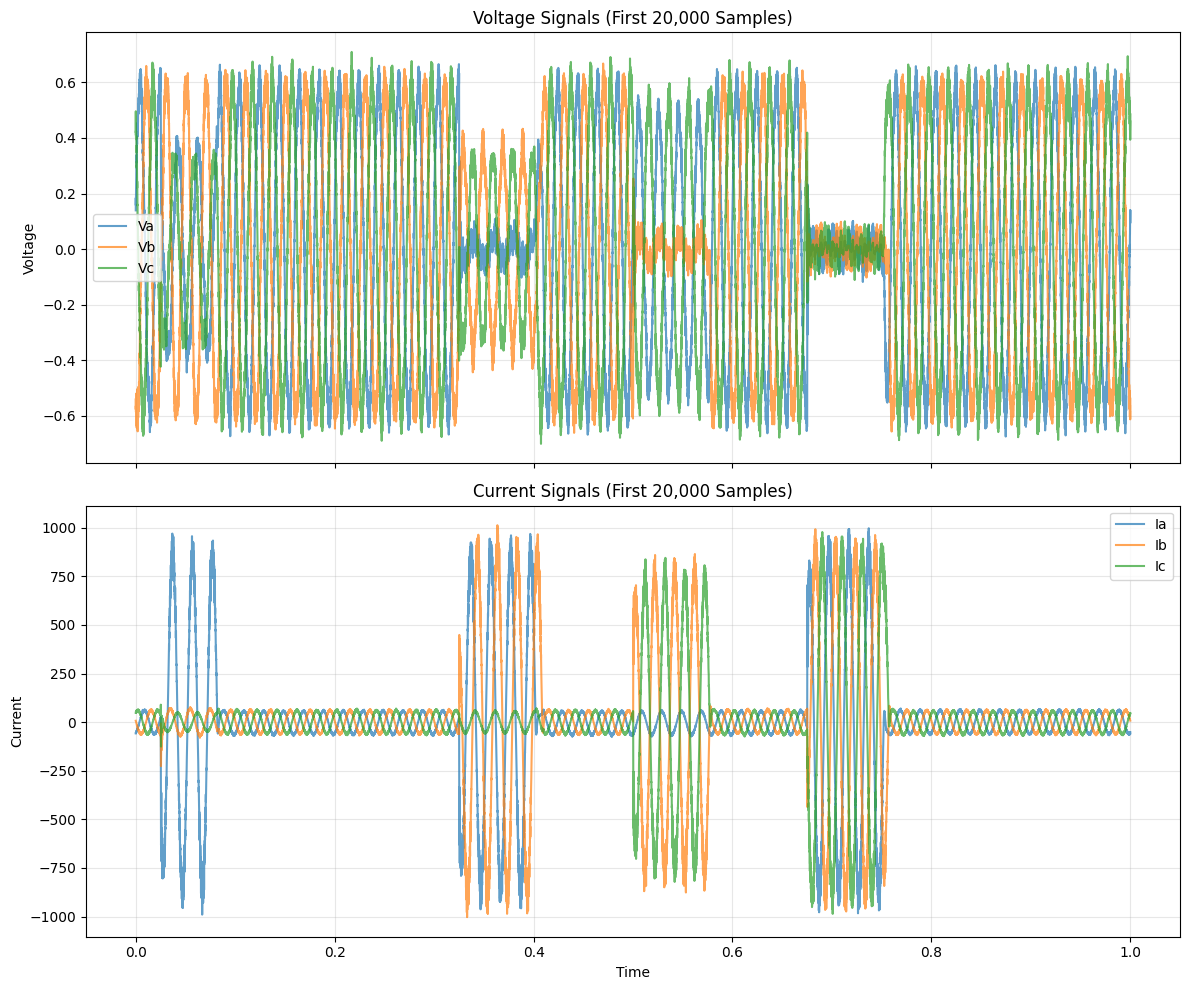

In [ ]:
# Extract the first 20000 samples of each signal
time_subset = data['Time'][:20000]
Va_subset = data['Va'][:20000]
Vb_subset = data['Vb'][:20000]
Vc_subset = data['Vc'][:20000]
Ia_subset = data['Ia'][:20000]
Ib_subset = data['Ib'][:20000]
Ic_subset = data['Ic'][:20000]

# Create a figure with two subplots
fig, axs = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plot voltage signals (first 20000 samples)
axs[0].plot(time_subset, Va_subset, label='Va', linewidth=1.5, alpha=0.7)
axs[0].plot(time_subset, Vb_subset, label='Vb', linewidth=1.5, alpha=0.7)
axs[0].plot(time_subset, Vc_subset, label='Vc', linewidth=1.5, alpha=0.7)
axs[0].set_ylabel('Voltage')
axs[0].set_title('Voltage Signals (First 20,000 Samples)')
axs[0].legend()
axs[0].grid(True, alpha=0.3)

# Plot current signals (first 20000 samples)
axs[1].plot(time_subset, Ia_subset, label='Ia', linewidth=1.5, alpha=0.7)
axs[1].plot(time_subset, Ib_subset, label='Ib', linewidth=1.5, alpha=0.7)
axs[1].plot(time_subset, Ic_subset, label='Ic', linewidth=1.5, alpha=0.7)
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Current')
axs[1].set_title('Current Signals (First 20,000 Samples)')
axs[1].legend()
axs[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

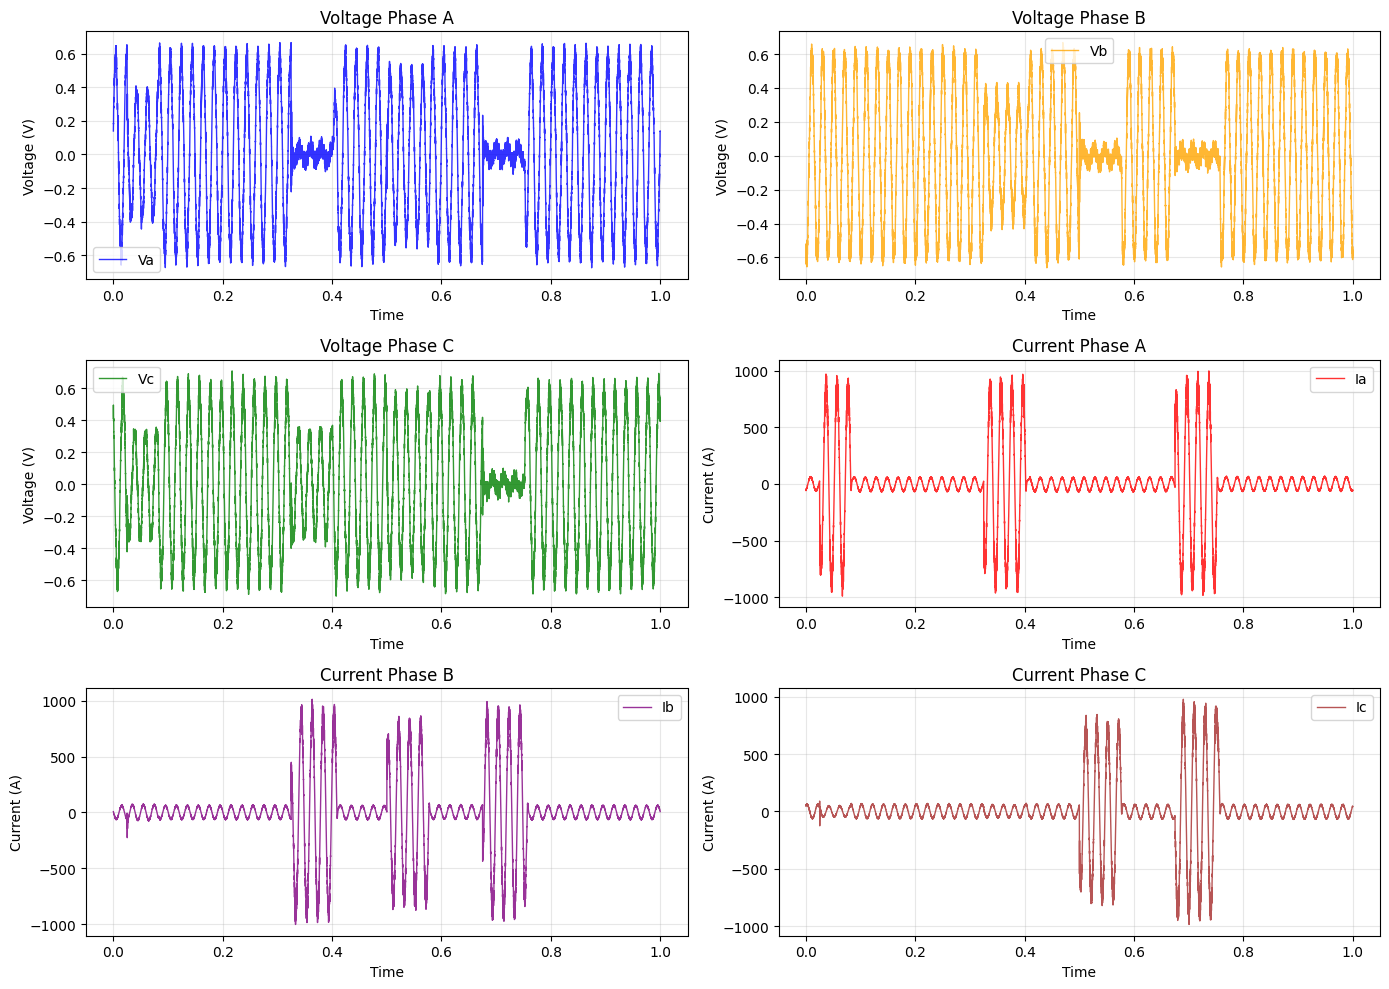

In [ ]:
plt.figure(figsize=(14, 10))

# Plot each signal in a separate subplot
plt.subplot(3, 2, 1)
plt.plot(time_subset, Va_subset, label='Va', color='blue', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase A')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 2)
plt.plot(time_subset, Vb_subset, label='Vb', color='orange', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase B')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 3)
plt.plot(time_subset, Vc_subset, label='Vc', color='green', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Voltage (V)')
plt.title('Voltage Phase C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 4)
plt.plot(time_subset, Ia_subset, label='Ia', color='red', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase A')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 5)
plt.plot(time_subset, Ib_subset, label='Ib', color='purple', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase B')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 2, 6)
plt.plot(time_subset, Ic_subset, label='Ic', color='brown', linewidth=1, alpha=0.8)
plt.xlabel('Time')
plt.ylabel('Current (A)')
plt.title('Current Phase C')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

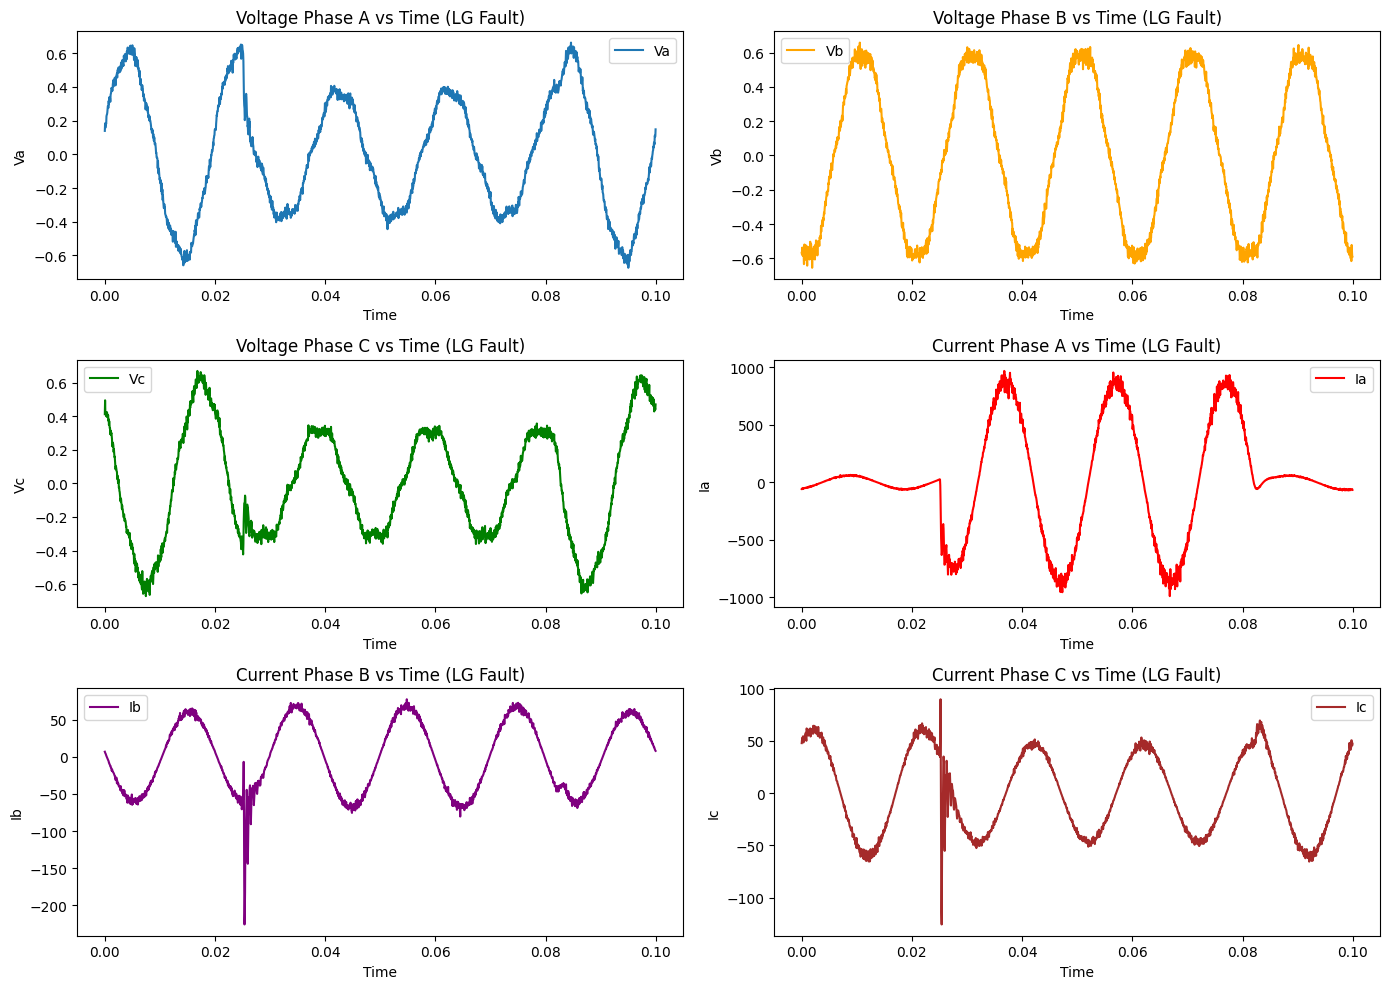

In [ ]:
# Determine the cutoff time
time_min = time_subset.min()
time_max = time_subset.max()
cutoff = time_min + 0.1 * (time_max - time_min)

# Filter data for the first 100 ms
data_first10 = data[data['Time'] <= cutoff]

time_10 = data_first10['Time']
Va_10 = data_first10['Va']
Vb_10 = data_first10['Vb']
Vc_10 = data_first10['Vc']
Ia_10 = data_first10['Ia']
Ib_10 = data_first10['Ib']
Ic_10 = data_first10['Ic']

plt.figure(figsize=(14, 10))

plt.subplot(3, 2, 1)
plt.plot(time_10, Va_10, label='Va')
plt.xlabel('Time')
plt.ylabel('Va')
plt.title('Voltage Phase A vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(time_10, Vb_10, label='Vb', color='orange')
plt.xlabel('Time')
plt.ylabel('Vb')
plt.title('Voltage Phase B vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(time_10, Vc_10, label='Vc', color='green')
plt.xlabel('Time')
plt.ylabel('Vc')
plt.title('Voltage Phase C vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(time_10, Ia_10, label='Ia', color='red')
plt.xlabel('Time')
plt.ylabel('Ia')
plt.title('Current Phase A vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(time_10, Ib_10, label='Ib', color='purple')
plt.xlabel('Time')
plt.ylabel('Ib')
plt.title('Current Phase B vs Time (LG Fault)')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(time_10, Ic_10, label='Ic', color='brown')
plt.xlabel('Time')
plt.ylabel('Ic')
plt.title('Current Phase C vs Time (LG Fault)')
plt.legend()

plt.tight_layout()
plt.show()

**•	Spectral Analysis:**

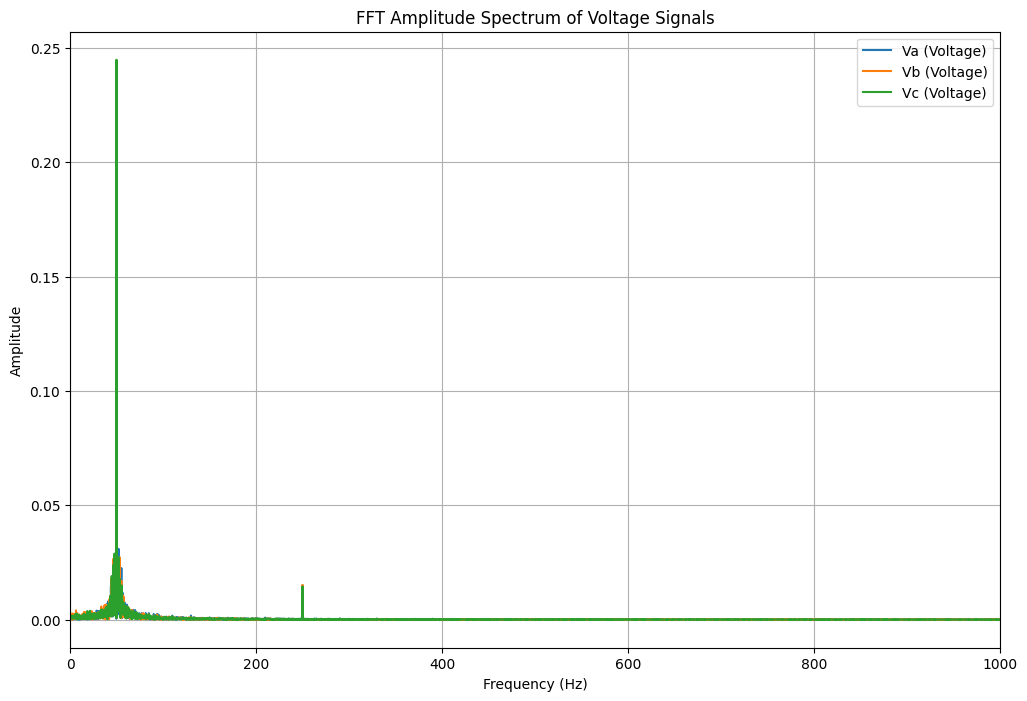

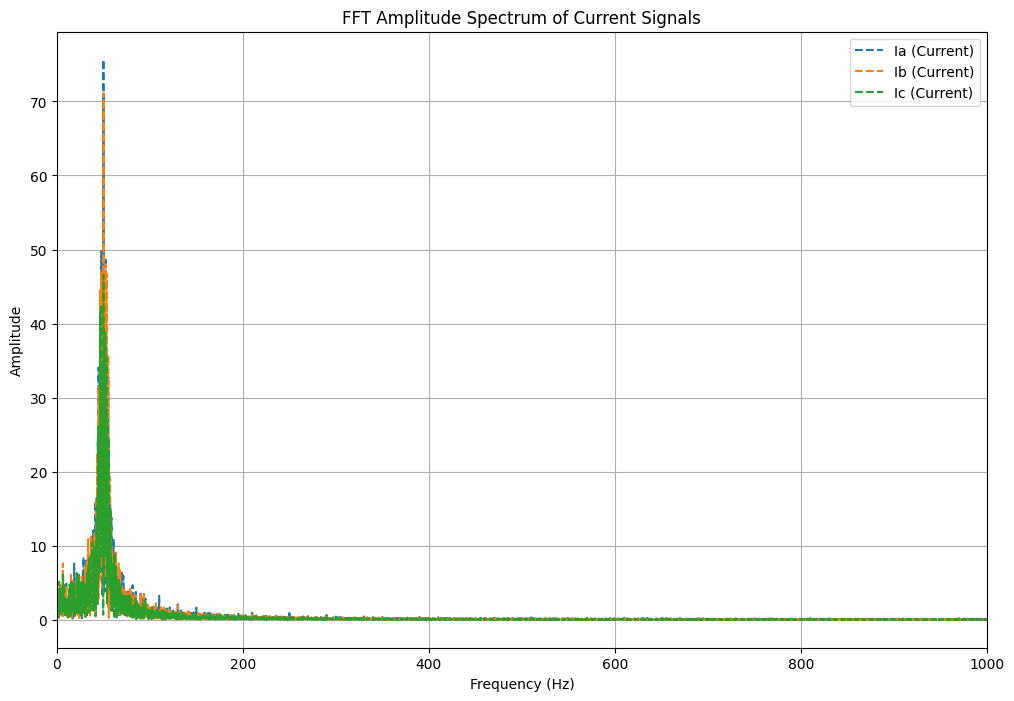

In [ ]:
# Extract the time and voltage signals (Va, Vb, Vc) and current signals (Ia, Ib, Ic) from the dataset
time = data['Time'].values
Va = data['Va'].values
Vb = data['Vb'].values
Vc = data['Vc'].values
Ia = data['Ia'].values
Ib = data['Ib'].values
Ic = data['Ic'].values

# ---------------------------
# Sampling Parameters
# ---------------------------
# Determine the sampling interval (dt) and the sampling frequency (Fs)
dt = time[1] - time[0]          # Sampling interval (time difference between two consecutive points)
Fs = 1.0 / dt                   # Sampling frequency (how frequently data points are sampled)
N = len(time)                   # Total number of data points (length of the time series)

# ---------------------------
# Fast Fourier Transform (FFT) Analysis for Voltage
# ---------------------------
# Compute the FFT for the voltage signals (Va, Vb, Vc)
fft_Va = fft(Va)
fft_Vb = fft(Vb)
fft_Vc = fft(Vc)

# Generate the corresponding frequency values (in Hz)
freq = fftfreq(N, dt)

# We are interested only in the positive frequencies, so filter out the negative ones.
# This is because the FFT produces both positive and negative frequencies, but they are symmetric.
mask = freq >= 0
freq_pos = freq[mask]

# Compute the amplitude spectrum for each voltage signal (normalized by N to avoid scaling issues)
amp_Va = np.abs(fft_Va)[mask] / N
amp_Vb = np.abs(fft_Vb)[mask] / N
amp_Vc = np.abs(fft_Vc)[mask] / N

# ---------------------------
# Fast Fourier Transform (FFT) Analysis for Current
# ---------------------------
# Compute the FFT for the current signals (Ia, Ib, Ic)
fft_Ia = fft(Ia)
fft_Ib = fft(Ib)
fft_Ic = fft(Ic)

# Compute the amplitude spectrum for each current signal (normalized by N)
amp_Ia = np.abs(fft_Ia)[mask] / N
amp_Ib = np.abs(fft_Ib)[mask] / N
amp_Ic = np.abs(fft_Ic)[mask] / N

# ---------------------------
# Plot the FFT Amplitude Spectrum for Voltage Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.plot(freq_pos, amp_Va, label='Va (Voltage)', linewidth=1.5)
plt.plot(freq_pos, amp_Vb, label='Vb (Voltage)', linewidth=1.5)
plt.plot(freq_pos, amp_Vc, label='Vc (Voltage)', linewidth=1.5)
plt.xlim(0, 1000)  # Limit the frequency range for clarity (adjust if necessary)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Amplitude Spectrum of Voltage Signals')
plt.legend()
plt.grid(True)
plt.show()

# ---------------------------
# Plot the FFT Amplitude Spectrum for Current Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.plot(freq_pos, amp_Ia, label='Ia (Current)', linestyle='--', linewidth=1.5)
plt.plot(freq_pos, amp_Ib, label='Ib (Current)', linestyle='--', linewidth=1.5)
plt.plot(freq_pos, amp_Ic, label='Ic (Current)', linestyle='--', linewidth=1.5)
plt.xlim(0, 1000)  # Limit the frequency range for clarity (adjust if necessary)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('FFT Amplitude Spectrum of Current Signals')
plt.legend()
plt.grid(True)
plt.show()


**Continuous Wavelet Transform (CWT) Analysis:**

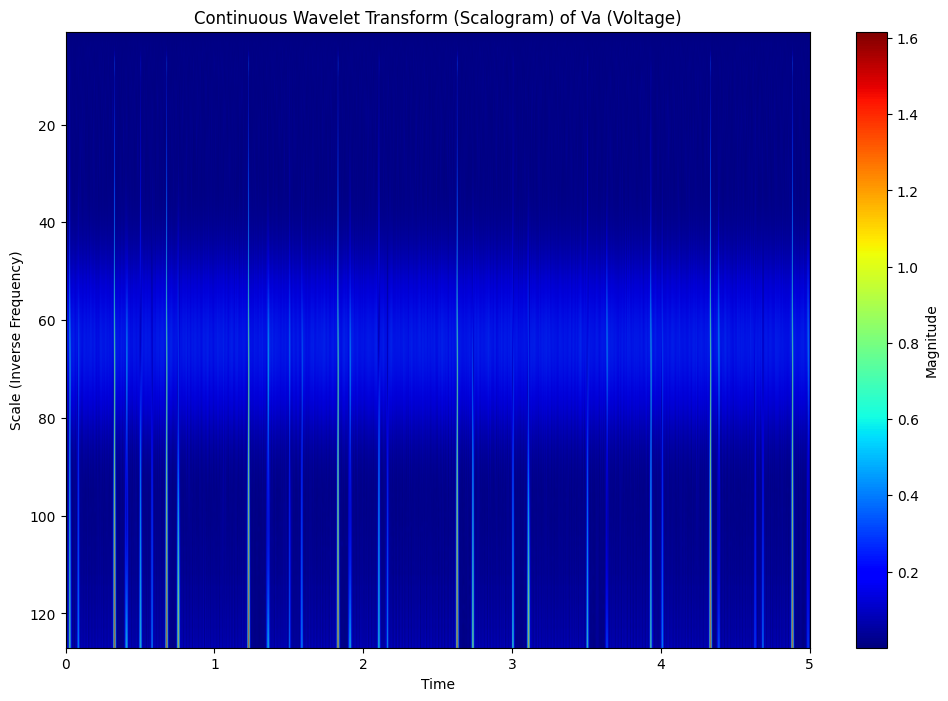

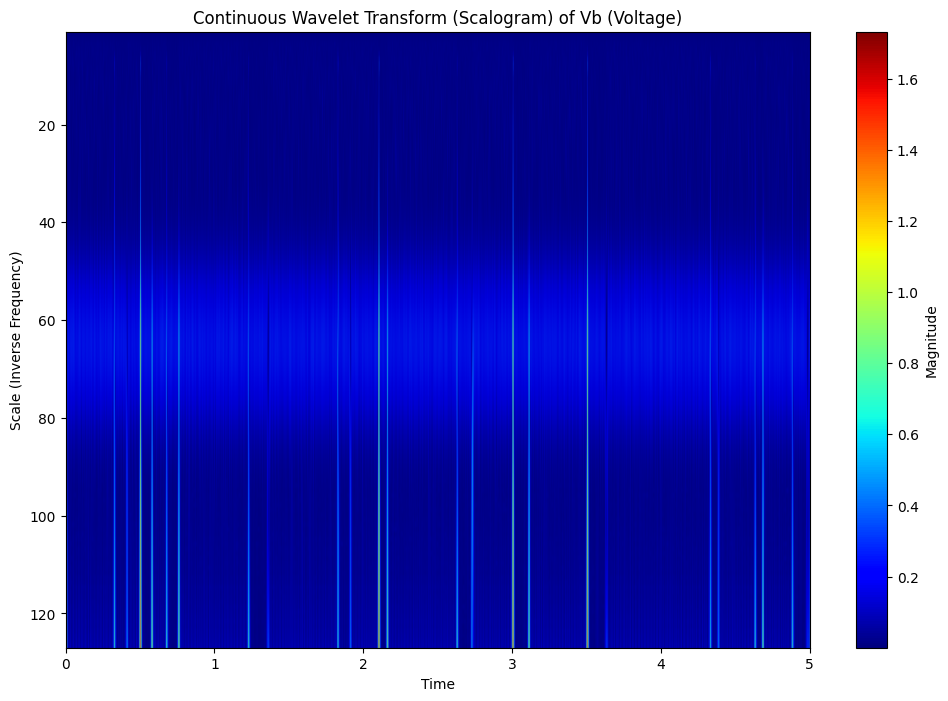

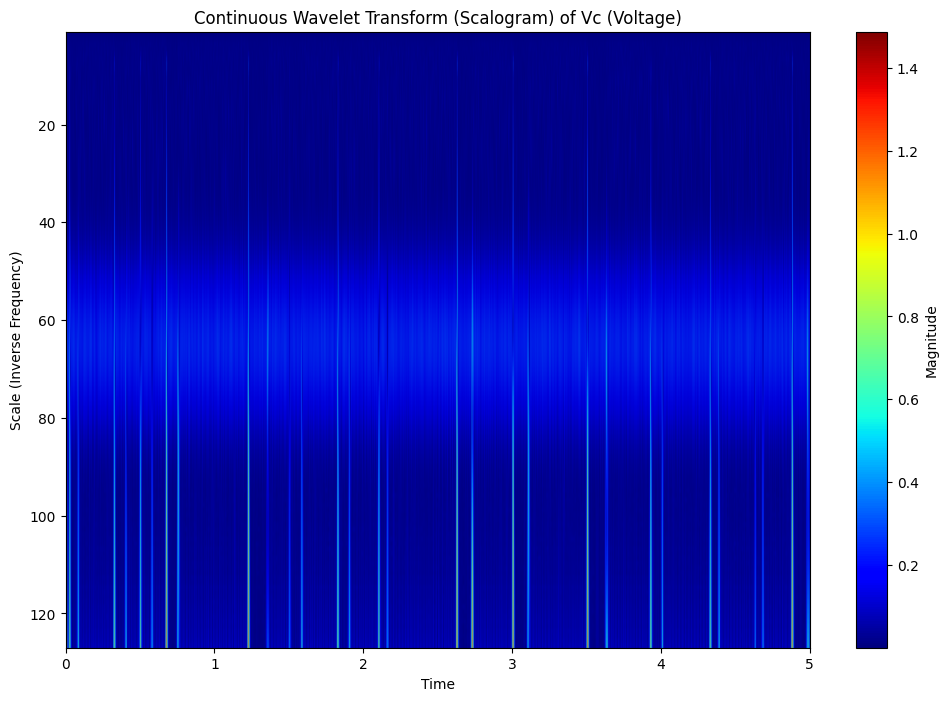

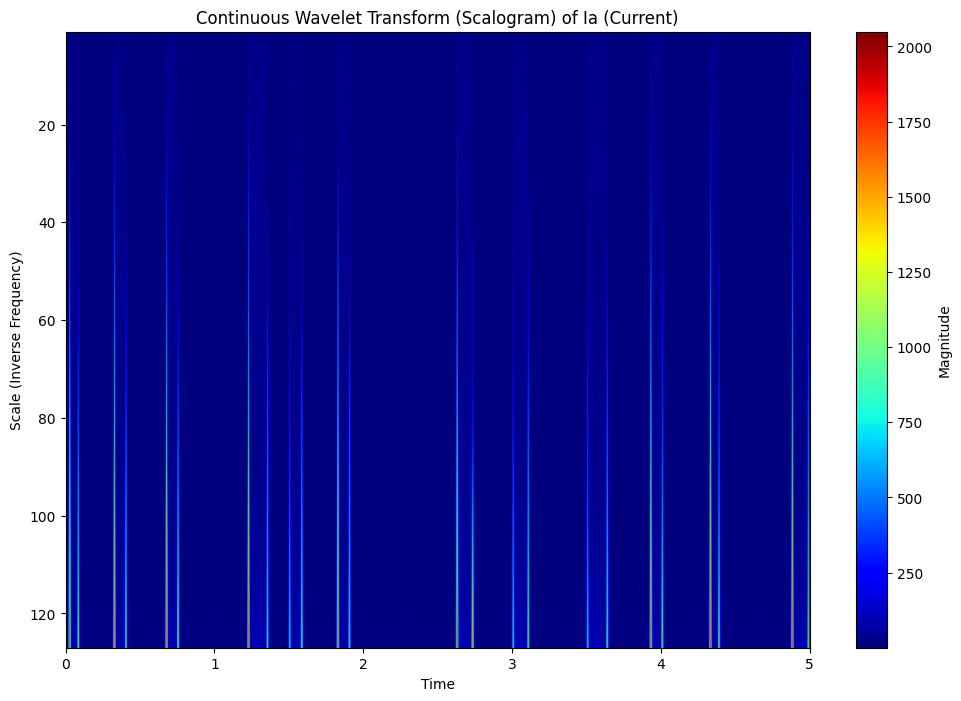

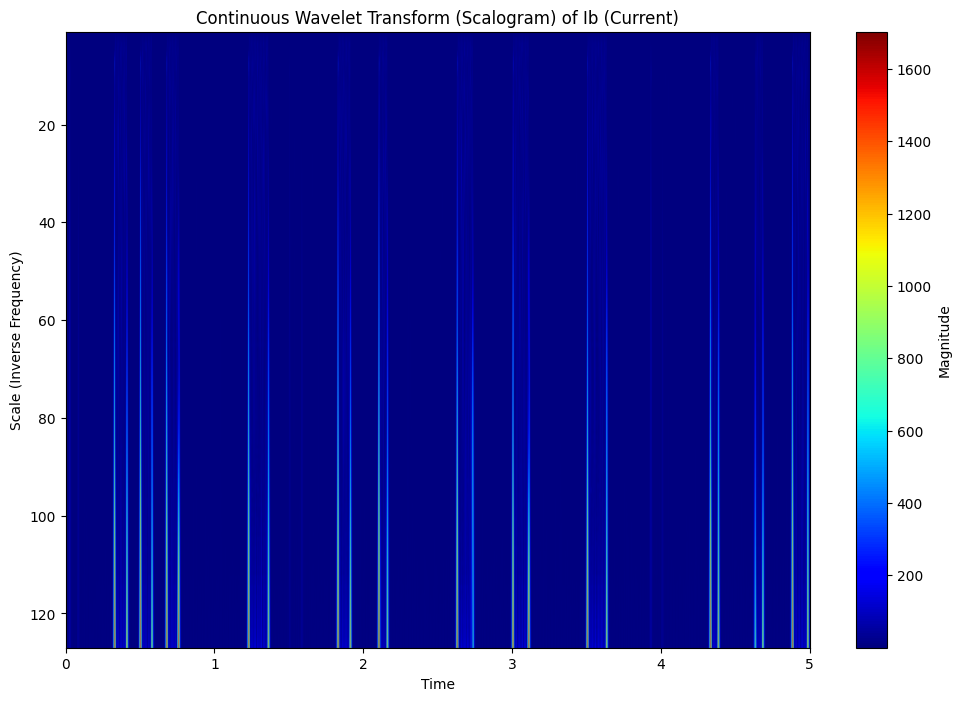

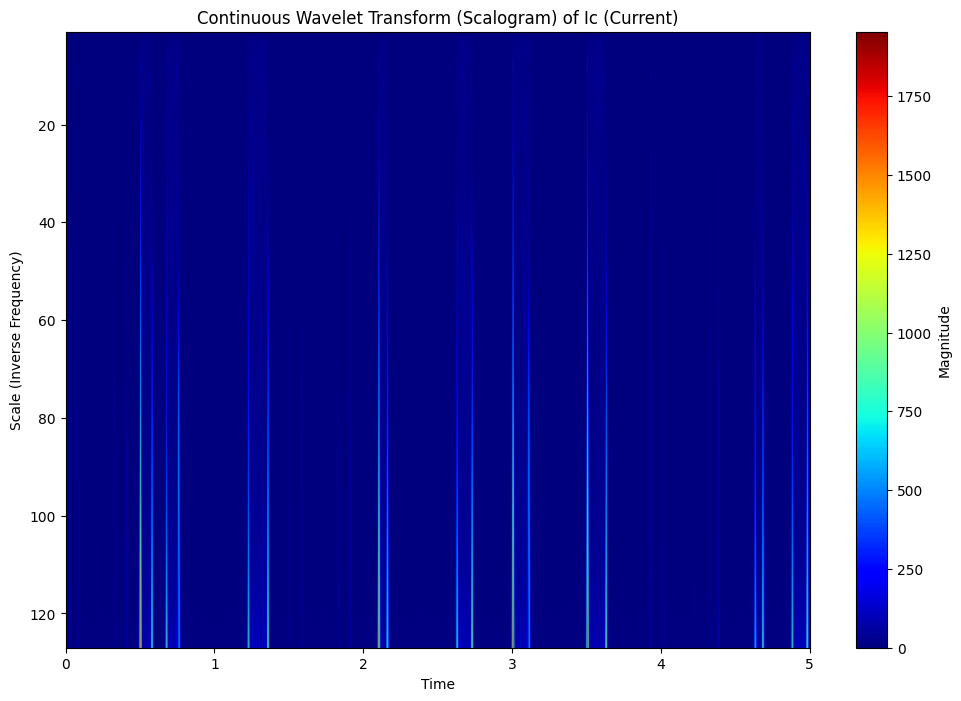

In [ ]:
# ---------------------------
# Sampling Parameters
# ---------------------------
dt = time[1] - time[0]  # Sampling interval (time difference between two consecutive points)

# ---------------------------
# Continuous Wavelet Transform (CWT) for Voltage Signals
# ---------------------------
scales = np.arange(1, 128)  # Define scales for the CWT analysis (higher scale means lower frequency)

# Perform CWT using the Morlet wavelet for the voltage signals (Va, Vb, Vc)
cwt_Va, frequencies_Va = pywt.cwt(Va, scales, 'morl', dt)
cwt_Vb, frequencies_Vb = pywt.cwt(Vb, scales, 'morl', dt)
cwt_Vc, frequencies_Vc = pywt.cwt(Vc, scales, 'morl', dt)

# ---------------------------
# Continuous Wavelet Transform (CWT) for Current Signals
# ---------------------------
# Perform CWT using the Morlet wavelet for the current signals (Ia, Ib, Ic)
cwt_Ia, frequencies_Ia = pywt.cwt(Ia, scales, 'morl', dt)
cwt_Ib, frequencies_Ib = pywt.cwt(Ib, scales, 'morl', dt)
cwt_Ic, frequencies_Ic = pywt.cwt(Ic, scales, 'morl', dt)

# ---------------------------
# Plot the CWT Scalogram for Voltage Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Va), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Va (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Vb), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Vb (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Vc), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Vc (Voltage)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

# ---------------------------
# Plot the CWT Scalogram for Current Signals
# ---------------------------
plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ia), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ia (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ib), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ib (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()

plt.figure(figsize=(12, 8))
plt.imshow(np.abs(cwt_Ic), extent=[time[0], time[-1], scales[-1], scales[0]], aspect='auto', cmap='jet')
plt.title('Continuous Wavelet Transform (Scalogram) of Ic (Current)')
plt.xlabel('Time')
plt.ylabel('Scale (Inverse Frequency)')
plt.colorbar(label='Magnitude')
plt.show()


# 2. Preprocessing the Signals

* **Remove noise**  from the signals using a low-pass filter (since we have sinusoidal signals, we want to keep the low-frequency components intact).

* **Normalize** the data to bring all signals to a similar scale (between 0 and 1).

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew, kurtosis
from scipy.signal import butter, filtfilt

In [ ]:
# Low-pass filter to remove high-frequency noise
def butter_lowpass(cutoff, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=4):
    b, a = butter_lowpass(cutoff, fs, order)
    return filtfilt(b, a, data)

# Apply the filter to your signals
fs = 1 / (time[1] - time[0])  # Sampling frequency
cutoff = 50  # Set cutoff frequency based on your signal characteristics
Va_filtered = butter_lowpass_filter(Va, cutoff, fs)
Vb_filtered = butter_lowpass_filter(Vb, cutoff, fs)
Vc_filtered = butter_lowpass_filter(Vc, cutoff, fs)
Ia_filtered = butter_lowpass_filter(Ia, cutoff, fs)
Ib_filtered = butter_lowpass_filter(Ib, cutoff, fs)
Ic_filtered = butter_lowpass_filter(Ic, cutoff, fs)

# Normalize signals
scaler = StandardScaler()
signals_normalized = scaler.fit_transform(np.column_stack([Va_filtered, Vb_filtered, Vc_filtered, Ia_filtered, Ib_filtered, Ic_filtered]))

* **Feature Extraction**

In [ ]:
signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']
time = data['Time'].values

# -------------------------------
# Define windowing parameters
# -------------------------------
window_size = 500  # Number of samples per window
step_size = 250    # Step size for moving window (50% overlap for smoother transitions)

# Initialize a list to collect feature vectors for each window
features = []

# -------------------------------
# Slide the window over the dataset
# -------------------------------
for start in range(0, len(data) - window_size, step_size):
    end = start + window_size

    # Extract the current window from the DataFrame
    window = data.iloc[start:end]

    # Initialize a dictionary to store the features for this window
    feature_vector = {
        'start_time': time[start],
        'end_time': time[end - 1]  # Time interval covered by the current window
    }

    # -------------------------------
    # Loop through each signal (Va, Vb, Vc, Ia, Ib, Ic)
    # -------------------------------
    for sig in signals:
        sig_data = window[sig].values  # Extract signal values for this window

        # Statistical Features:
        feature_vector[f'{sig}_mean'] = np.mean(sig_data)        # Average value
        feature_vector[f'{sig}_std'] = np.std(sig_data)          # Standard deviation
        feature_vector[f'{sig}_min'] = np.min(sig_data)          # Minimum value
        feature_vector[f'{sig}_max'] = np.max(sig_data)          # Maximum value
        feature_vector[f'{sig}_skew'] = skew(sig_data)           # Skewness (asymmetry)
        feature_vector[f'{sig}_kurt'] = kurtosis(sig_data)       # Kurtosis (peakedness)

        # Signal Power Features:
        feature_vector[f'{sig}_rms'] = np.sqrt(np.mean(sig_data ** 2))  # RMS: effective power of the signal
        feature_vector[f'{sig}_peak2peak'] = np.ptp(sig_data)           # Peak-to-peak: max - min

        # Crest Factor = max(abs(signal)) / RMS
        rms = feature_vector[f'{sig}_rms']
        if rms > 0:
            feature_vector[f'{sig}_crest'] = np.max(np.abs(sig_data)) / rms
        else:
            feature_vector[f'{sig}_crest'] = 0  # Avoid division by zero

    # Append the dictionary of features to the list
    features.append(feature_vector)

# -------------------------------
# Convert the list of feature vectors into a DataFrame
# -------------------------------
feature_df = pd.DataFrame(features)

# Preview the first few rows of extracted features
feature_df.head()

,start_time,end_time,Va_mean,Va_std,Va_min,Va_max,Va_skew,Va_kurt,Va_rms,Va_peak2peak,...,Ib_crest,Ic_mean,Ic_std,Ic_min,Ic_max,Ic_skew,Ic_kurt,Ic_rms,Ic_peak2peak,Ic_crest
0,0.0000,0.02495,0.092808,0.428728,-0.658518,0.651908,-0.346911,-1.392566,0.438658,1.310426,...,1.675901,10.710026,44.039387,-65.470911,66.738489,-0.365025,-1.429969,45.322977,132.209400,1.472509
1,0.0125,0.03745,-0.099006,0.362516,-0.658518,0.651908,0.555319,-0.753360,0.375792,1.310426,...,4.368711,-4.873727,39.666491,-125.766085,89.795897,0.303720,-1.006448,39.964781,215.561982,3.146923
2,0.0250,0.04995,0.006288,0.256300,-0.402798,0.619913,0.058447,-1.216355,0.256377,1.022711,...,4.365569,-2.491809,33.244327,-125.766085,89.795897,-0.044102,-0.733335,33.337582,215.561982,3.772502
3,0.0375,0.06245,0.047282,0.266534,-0.443925,0.407094,-0.292076,-1.329664,0.270695,0.851019,...,1.717505,6.678497,33.224144,-51.312108,53.223546,-0.324722,-1.383960,33.888731,104.535655,1.570538
4,0.0500,0.07495,-0.069493,0.280090,-0.443925,0.401358,0.375917,-1.415987,0.288582,0.845283,...,1.658205,-8.470972,34.286945,-51.312108,53.223546,0.368462,-1.434876,35.317871,104.535655,1.506986


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import TimeSeriesSplit
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.mixture import GaussianMixture
from sklearn.metrics import precision_score, recall_score, f1_score
from tensorflow.keras.layers import Input, LSTM, Dense, RepeatVector, TimeDistributed

**Apply PCA**

In [ ]:
# Extract the features (drop time columns)
X_features = feature_df.drop(columns=['start_time', 'end_time'])

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Apply PCA - let's try reducing to 95% variance
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# The number of principal components
print(f"Number of components after PCA: {X_pca.shape[1]}")

Number of components after PCA: 14


# Anomaly Detection


In [ ]:
# Ground truth anomaly intervals (format: [start, end])
anomaly_intervals = [
    [0.025, 0.075], [1.500, 1.575], [3.925, 4.000],   # LG
    [0.325, 0.4], [1.825, 1.900], [4.325, 4.375],      # LLG
    [0.500, 0.575], [2.100, 2.150], [4.625, 4.675],    # LL
    [0.675, 0.750], [2.625, 2.725], [3.000, 3.100],    # LLL
    [1.225, 1.350], [3.500, 3.625], [4.875, 4.975]     # LLLG
]

# Initialize labels (0 = normal, 1 = anomaly)
y = np.zeros(len(feature_df))

# Check overlap between each window and anomaly intervals
for idx, row in feature_df.iterrows():
    window_start = row['start_time']
    window_end = row['end_time']
    for interval in anomaly_intervals:
        int_start, int_end = interval
        # Check for overlap
        if (window_start < int_end) and (window_end > int_start):
            y[idx] = 1
            break  # No need to check other intervals once overlap is found

In [ ]:
# Split into training (first 70%) and testing (last 30%)
split_idx = int(0.7 * len(feature_df))
X_train = X_pca[:split_idx]  # PCA-transformed features
X_test = X_pca[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

**Build an Isolation Forest model**

In [ ]:
# Calculate anomaly fraction in the training set
contamination = y_train.mean()

# Handle edge case where contamination is 0
if contamination <= 0:
    contamination = 'auto'  # Use default if no anomalies in training

# Initialize and train the model
if_model = IsolationForest(
    contamination=contamination,
    random_state=42,
    n_estimators=100  # Increase for stability
)
if_model.fit(X_train)

IsolationForest(contamination=np.float64(0.26523297491039427), random_state=42)

In [ ]:
# Predict anomalies (-1 = anomaly, 1 = normal)
if_test_preds = if_model.predict(X_test)

# Convert predictions to binary (1 = anomaly, 0 = normal)
if_y_pred = np.where(if_test_preds == -1, 1, 0)

# Evaluate performance
print("Classification Report:")
print(classification_report(y_test, if_y_pred))

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        83
         1.0       0.87      0.89      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120



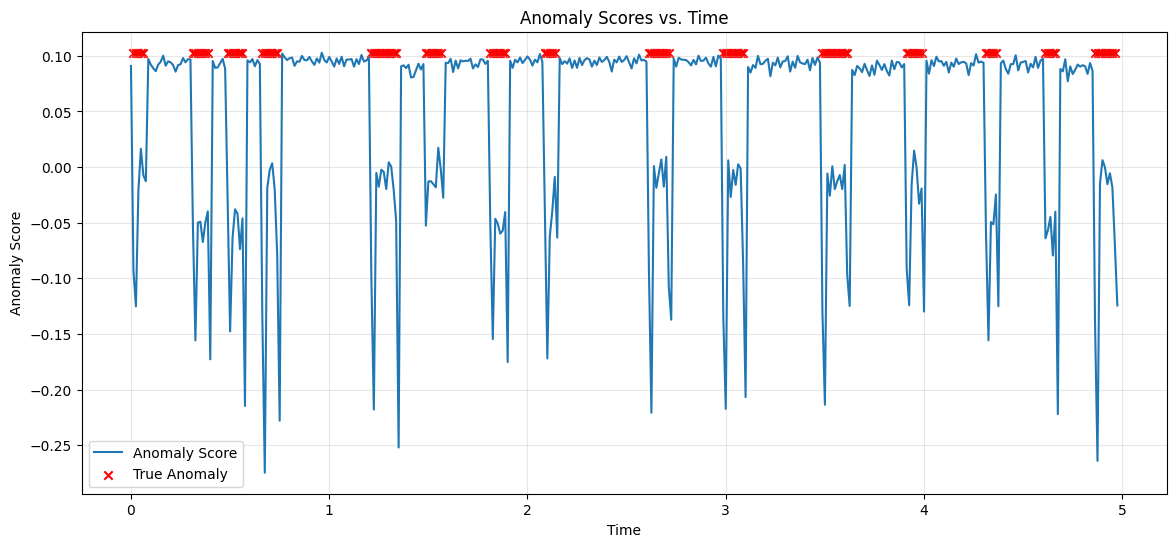

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], if_model.decision_function(X_pca), label='Anomaly Score')

# Ensure sum(y) is an integer for the number of markers
num_anomalies = int(sum(y))  # Convert float to integer

plt.scatter(
    feature_df['start_time'][y == 1],
    np.max(if_model.decision_function(X_pca)) * np.ones(num_anomalies),
    color='red', marker='x', label='True Anomaly'
)

plt.xlabel('Time')
plt.ylabel('Anomaly Score')
plt.title('Anomaly Scores vs. Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**One-Class SVM**

In [ ]:
# Estimate anomaly fraction in the training set
nu = y_train.mean() + 0.01  # Small buffer for unseen anomalies
nu = np.clip(nu, 0.01, 0.5)  # Ensure nu is within valid range [0.01, 0.5]

# Initialize and train One-Class SVM
svm_model = OneClassSVM(
    kernel='rbf',       # Default kernel for non-linear boundaries
    gamma='scale',      # Automatically adjust gamma based on data variance
    nu=nu,              # Expected fraction of outliers (~contamination)
)
svm_model.fit(X_train)

OneClassSVM(nu=np.float64(0.2752329749103943))

In [ ]:
# Predict on test data (-1 = anomaly, 1 = normal)
svm_test_preds = svm_model.predict(X_test)

# Convert predictions to binary labels (1 = anomaly, 0 = normal)
svm_y_pred = np.where(svm_test_preds == -1, 1, 0)

# Evaluate performance
from sklearn.metrics import classification_report, f1_score
print("Classification Report:")
print(classification_report(y_test, svm_y_pred))
print(f"F1 Score: {f1_score(y_test, svm_y_pred):.3f}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95        83
         1.0       0.87      0.89      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120

F1 Score: 0.880


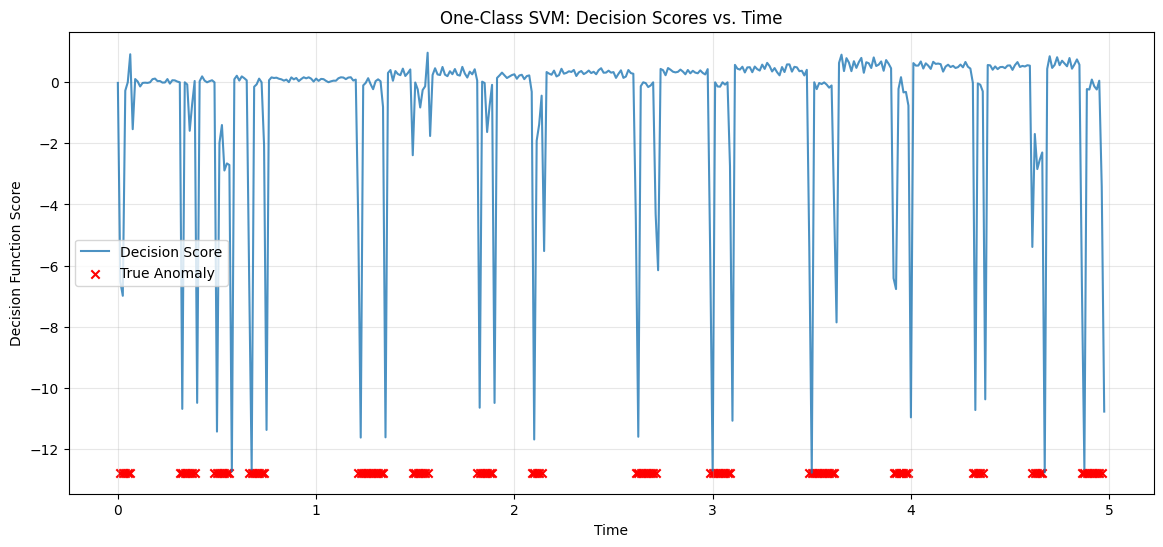

In [ ]:
# Get decision scores (lower scores = more anomalous)
decision_scores = svm_model.decision_function(X_pca)

plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], decision_scores, label='Decision Score', alpha=0.8)
plt.scatter(
    feature_df['start_time'][y == 1],
    np.min(decision_scores) * np.ones(int(sum(y))),  # Highlight true anomalies
    color='red', marker='x', label='True Anomaly'
)
plt.xlabel('Time')
plt.ylabel('Decision Function Score')
plt.title('One-Class SVM: Decision Scores vs. Time')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

**Guaussian Mixture Model**

In [ ]:
# --------------------------------------------------------
# Step 1: Train GMM on training data (including anomalies)
# --------------------------------------------------------
# Choose number of components
n_components = 5  # Start with a reasonable guess; tune later

gmm_model = GaussianMixture(
    n_components=n_components,
    covariance_type='full',  # Capture complex correlations
    random_state=42
)
gmm_model.fit(X_train)  # Fit to training data

# --------------------------------------------------------
# Step 2: Compute log-likelihoods for anomaly scoring
# --------------------------------------------------------
# Calculate log-likelihood for all windows (lower = more anomalous)
gmm_train_log_likelihood = gmm_model.score_samples(X_train)
gmm_test_log_likelihood = gmm_model.score_samples(X_test)

# Combine train and test scores for visualization
gmm_full_log_likelihood = np.concatenate([gmm_train_log_likelihood, gmm_test_log_likelihood])

# --------------------------------------------------------
# Step 3: Determine threshold based on training data
# --------------------------------------------------------
# Use contamination rate from training labels to set threshold
gmm_contamination = y_train.mean()
threshold = np.percentile(gmm_train_log_likelihood, 100 * gmm_contamination)

In [ ]:
# Predict anomalies (1 = anomaly, 0 = normal)
gmm_y_pred = (gmm_full_log_likelihood < threshold).astype(int)
gmm_y_pred_test = gmm_y_pred[split_idx:]  # Test set predictions

# --------------------------------------------------------
# Step 4: Evaluate performance on test set
# --------------------------------------------------------
print("GMM Classification Report:")
print(classification_report(y_test, gmm_y_pred_test))

GMM Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        83
         1.0       0.85      0.92      0.88        37

    accuracy                           0.93       120
   macro avg       0.91      0.92      0.91       120
weighted avg       0.93      0.93      0.93       120



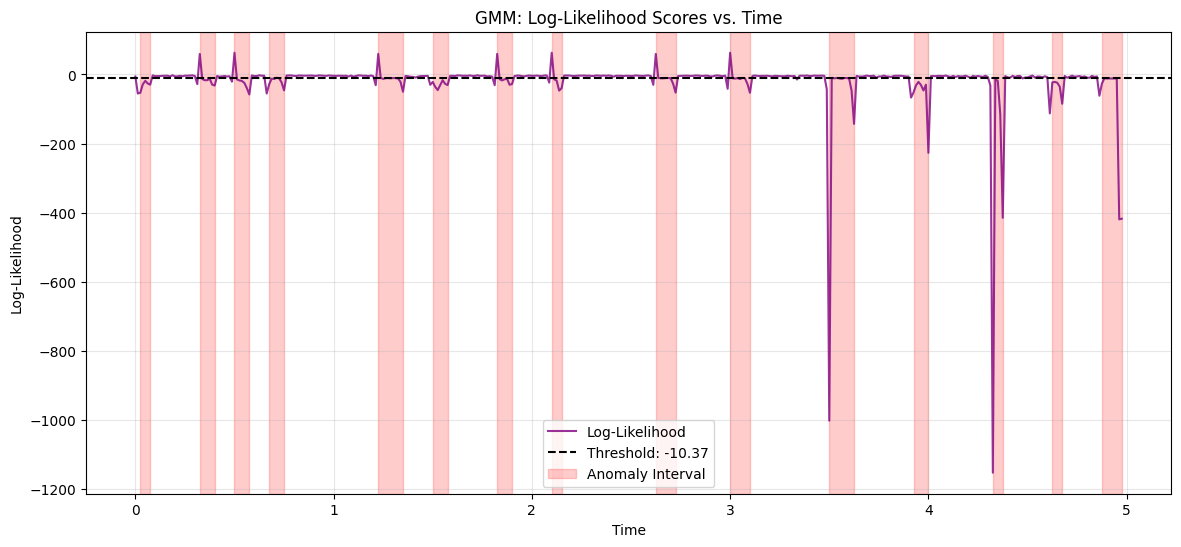

In [ ]:
# --------------------------------------------------------
# Step 5: Visualize log-likelihoods and anomalies
# --------------------------------------------------------
plt.figure(figsize=(14, 6))
plt.plot(feature_df['start_time'], gmm_full_log_likelihood,
         label='Log-Likelihood', color='purple', alpha=0.8)
plt.axhline(threshold, color='black', linestyle='--',
            label=f'Threshold: {threshold:.2f}')

# Plot anomaly intervals
for i, interval in enumerate(anomaly_intervals):
    plt.axvspan(interval[0], interval[1],
                color='red', alpha=0.2,
                label='Anomaly Interval' if i == 0 else None)

plt.xlabel('Time')
plt.ylabel('Log-Likelihood')
plt.title('GMM: Log-Likelihood Scores vs. Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

**LSTM auto-encoder**

In [ ]:
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, RepeatVector, TimeDistributed
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# -----------------------------------------------------------------
# Step 1: Preprocess Data (Ensure no NaNs)
# -----------------------------------------------------------------
raw_signals = data[['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']].values

# Normalize and check for NaNs
scaler = StandardScaler()
scaled_signals = scaler.fit_transform(raw_signals)
assert not np.isnan(scaled_signals).any(), "NaNs detected in input!"

import joblib
joblib.dump(scaler, 'scaler.save')

# Create sequences (shorter sequence length)
sequence_length = 50  # Reduced from 100
X_sequences = []
for i in range(len(scaled_signals) - sequence_length + 1):
    X_sequences.append(scaled_signals[i:i+sequence_length])
X_sequences = np.array(X_sequences)

# Time-based split
split_idx = int(0.7 * len(X_sequences))
X_train, X_test = X_sequences[:split_idx], X_sequences[split_idx:]

In [ ]:
# -----------------------------------------------------------------
# Step 2: Simplified Model Architecture
# -----------------------------------------------------------------
input_dim = X_train.shape[2]
timesteps = X_train.shape[1]

# Encoder
inputs = Input(shape=(timesteps, input_dim))
x = Bidirectional(LSTM(32, activation='tanh', return_sequences=True))(inputs)
x = Bidirectional(LSTM(16, activation='tanh', return_sequences=False))(x)

# Bottleneck
x = RepeatVector(timesteps)(x)

# Decoder
x = Bidirectional(LSTM(16, activation='tanh', return_sequences=True))(x)
x = Bidirectional(LSTM(32, activation='tanh', return_sequences=True))(x)
outputs = TimeDistributed(Dense(input_dim))(x)

autoencoder = Model(inputs, outputs)

# Optimizer with gradient clipping
optimizer = Adam(learning_rate=1e-4, clipvalue=1.0)
autoencoder.compile(optimizer=optimizer, loss='mse')

In [ ]:
# -----------------------------------------------------------------
# Step 3: Train with Early Stopping
# -----------------------------------------------------------------
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, X_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 148s 480ms/step - loss: 0.6852 - val_loss: 0.1891
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 136s 459ms/step - loss: 0.1274 - val_loss: 0.0645
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 114s 416ms/step - loss: 0.0542 - val_loss: 0.0428
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 125s 456ms/step - loss: 0.0387 - val_loss: 0.0340
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 142s 454ms/step - loss: 0.0310 - val_loss: 0.0281
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 124s 454ms/step - loss: 0.0253 - val_loss: 0.0233
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 142s 455ms/step - loss: 0.0205 - val_loss: 0.0194
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 447ms/step - loss: 0.0169 - val_loss: 0.0166
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 144s 457ms/step - loss: 0.0145 - val_loss: 0.0144
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 140s 451ms/step - loss: 0.0124 - val_loss: 0.0127
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 141s 449ms/step - loss: 0.0110 - val_loss: 0.0115
Epoch 12

3124/3124 ━━━━━━━━━━━━━━━━━━━━ 105s 34ms/step


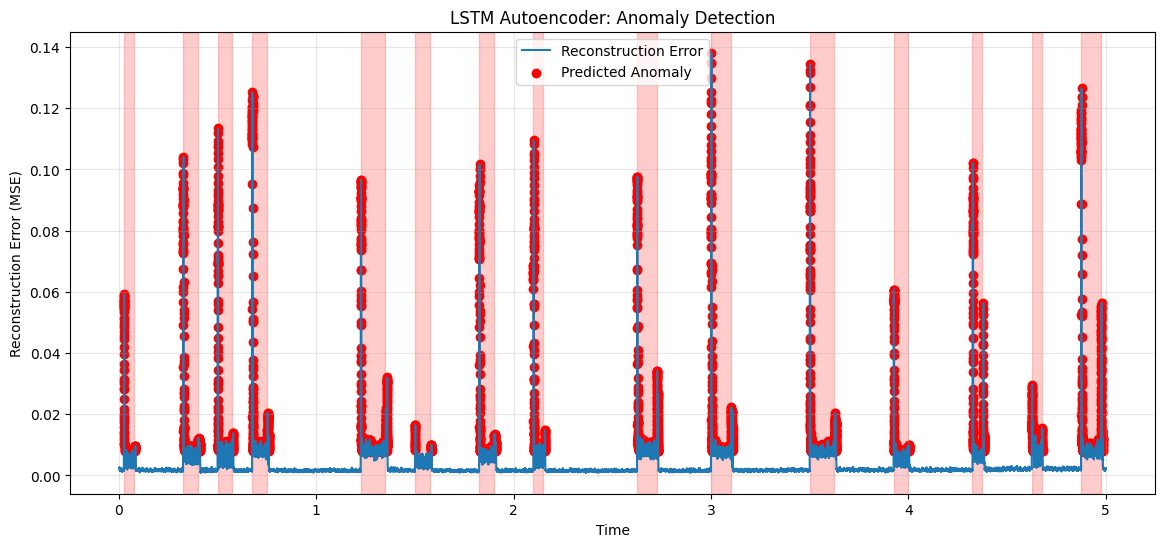

In [ ]:
# Get the time values corresponding to the END of each window
time_sequences = data['Time'].values[sequence_length - 1 :]  # Shape: (len(mse),)

# Calculate reconstruction error for each sequence
reconstructions = autoencoder.predict(X_sequences)
mse = np.mean(np.square(X_sequences - reconstructions), axis=(1, 2))

# Label anomalies (e.g., top 10% MSE)
threshold = np.percentile(mse, 90)
anomalies = mse > threshold

plt.figure(figsize=(14, 6))

# Plot reconstruction error (aligned with window end times)
plt.plot(time_sequences, mse, label='Reconstruction Error')

# Highlight predicted anomalies (use time_sequences instead of data['Time'])
plt.scatter(
    time_sequences[anomalies],  # Correct indexing
    mse[anomalies],
    color='red', label='Predicted Anomaly'
)

# Add ground truth anomaly intervals (as shaded regions)
for interval in anomaly_intervals:
    plt.axvspan(interval[0], interval[1], color='red', alpha=0.2)

plt.xlabel('Time')
plt.ylabel('Reconstruction Error (MSE)')
plt.title('LSTM Autoencoder: Anomaly Detection')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [ ]:
# Save the trained model
model_save_path = "lstm_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(autoencoder, model_save_path)

Test other models

In [ ]:
# Preprocessing

signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[signals])

import joblib
joblib.dump(scaler, 'scaler2.save')

# Create sequences
sequence_length = 50  # Same as LSTM model
X = []
for i in range(len(scaled_data) - sequence_length + 1):
    X.append(scaled_data[i:i+sequence_length])
X = np.array(X)

# Time-based split
split_idx = int(0.7 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]

RNN Model

In [ ]:
def build_rnn_model():
    model = tf.keras.Sequential([
        tf.keras.layers.SimpleRNN(64, activation='tanh',
                                return_sequences=True,
                                input_shape=(sequence_length, len(signals))),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.SimpleRNN(32, activation='tanh'),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.RepeatVector(sequence_length),
        tf.keras.layers.SimpleRNN(32, activation='tanh',
                                return_sequences=True),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.SimpleRNN(64, activation='tanh',
                                return_sequences=True),
        tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(len(signals)))
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mse')
    return model

rnn_model = build_rnn_model()

# Enhanced early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,  # Increased from 3 to 5
    verbose=1,
    restore_best_weights=True  # Critical addition
)

rnn_history = rnn_model.fit(
    X_train, X_train,
    epochs=50,  # Increased max epochs
    batch_size=256,  # Larger batch size
    validation_data=(X_test, X_test),
    callbacks=[early_stop]
)

# Save the trained model
model_save_path = "rnn_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(rnn_model, model_save_path)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 124s 289ms/step - loss: 0.3843 - val_loss: 0.0756
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 65s 228ms/step - loss: 0.1080 - val_loss: 0.0637
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - loss: 0.0821 - val_loss: 0.0447
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 82s 227ms/step - loss: 0.0682 - val_loss: 0.0300
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 80s 220ms/step - loss: 0.0579 - val_loss: 0.0275
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 70s 257ms/step - loss: 0.0648 - val_loss: 0.0363
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 73s 265ms/step - loss: 0.0616 - val_loss: 0.0341
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 70s 224ms/step - loss: 0.0601 - val_loss: 0.0490
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 89s 249ms/step - loss: 0.0599 - val_loss: 0.0278
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 60s 220ms/step - loss: 0.0666 - val_loss: 0.0380
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 5.


1D CNN Model

In [ ]:
def build_cnn_model():
    model = tf.keras.Sequential([
        # Encoder
        tf.keras.layers.Conv1D(64, 5, activation='relu',  # Increased filters
                              padding='same',
                              input_shape=(sequence_length, len(signals))),
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Conv1D(32, 3, activation='relu', padding='same'),  # Increased filters
        tf.keras.layers.Dropout(0.3),  # Added dropout

        # Decoder
        tf.keras.layers.UpSampling1D(2),
        tf.keras.layers.Conv1D(64, 3, activation='relu', padding='same'),  # Increased filters
        tf.keras.layers.Dropout(0.3),  # Added dropout
        tf.keras.layers.Conv1D(len(signals), 5, activation='linear', padding='same')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='mse')
    return model

cnn_model = build_cnn_model()

# Shared early stopping configuration
cnn_history = cnn_model.fit(
    X_train, X_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test, X_test),
    callbacks=[early_stop]  # Same early stopping config
)

# Save the model
model_save_path = "cnn_autoencoder_anomaly_detection.h5"
tf.keras.models.save_model(cnn_model, model_save_path)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 29s 96ms/step - loss: 0.2672 - val_loss: 0.0550
Epoch 2/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 25s 93ms/step - loss: 0.0573 - val_loss: 0.0395
Epoch 3/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 26s 95ms/step - loss: 0.0451 - val_loss: 0.0293
Epoch 4/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 94ms/step - loss: 0.0393 - val_loss: 0.0247
Epoch 5/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 42s 98ms/step - loss: 0.0358 - val_loss: 0.0211
Epoch 6/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 98ms/step - loss: 0.0335 - val_loss: 0.0171
Epoch 7/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - loss: 0.0318 - val_loss: 0.0152
Epoch 8/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 97ms/step - loss: 0.0306 - val_loss: 0.0123
Epoch 9/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 41s 99ms/step - loss: 0.0295 - val_loss: 0.0132
Epoch 10/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 40s 97ms/step - loss: 0.0287 - val_loss: 0.0114
Epoch 11/50
274/274 ━━━━━━━━━━━━━━━━━━━━ 27s 98ms/step - loss: 0.0282 - val_loss: 0.0112
Epoch 12/50
274/274 ━━━━━━━━━━

3124/3124 ━━━━━━━━━━━━━━━━━━━━ 125s 40ms/step
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 52s 17ms/step
3124/3124 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step

Model Comparison:
  model_name  train_loss  val_loss  num_anomalies
0       LSTM    0.003569  0.004157           4998
1        RNN    0.027014  0.027543           4998
2        CNN    0.007065  0.007627           4998


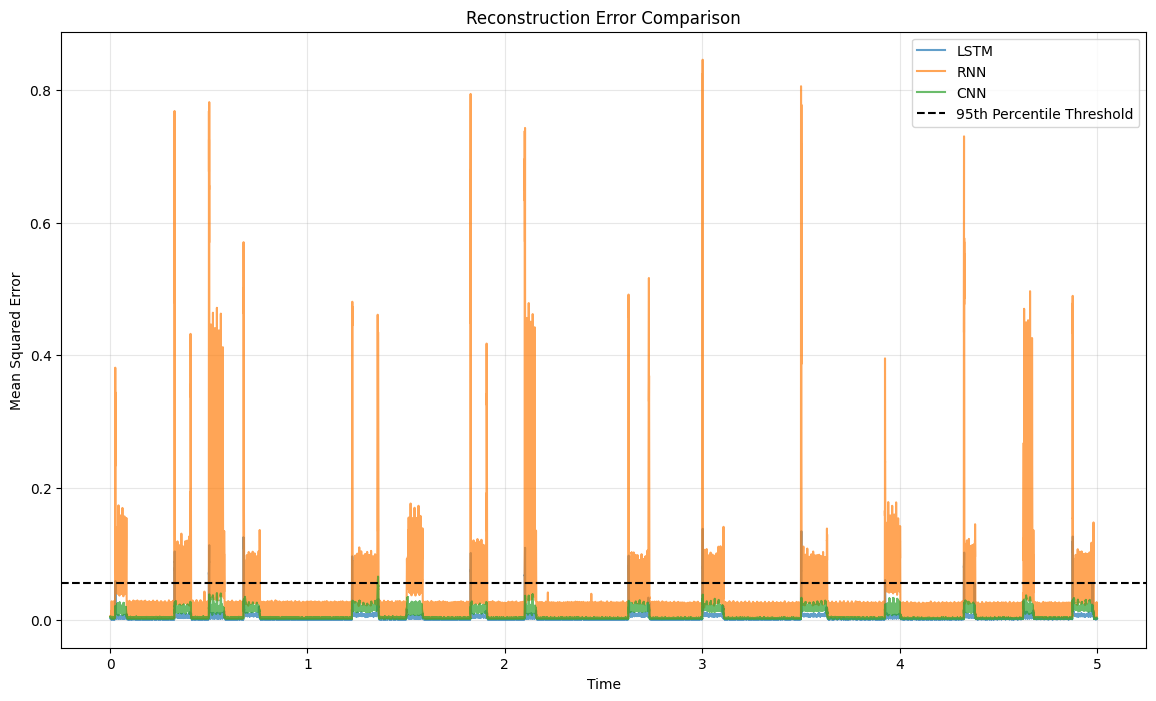

In [ ]:
# 1. Load LSTM model
lstm_model = tf.keras.models.load_model(
    '/content/lstm_autoencoder_anomaly_detection.h5',
    custom_objects={'mse': 'mse'}
)

# 2. Calculate metrics for all three models
def calculate_metrics(model, model_name, X_train, X_test, X_full):
    # Get reconstruction errors
    reconstructions = model.predict(X_full)
    mse = np.mean(np.square(X_full - reconstructions), axis=(1,2))

    # Anomaly detection
    threshold = np.percentile(mse, 95)
    anomalies = mse > threshold

    # Training and validation loss
    train_loss = model.evaluate(X_train, X_train, verbose=0)
    val_loss = model.evaluate(X_test, X_test, verbose=0)

    return {
        'model_name': model_name,
        'train_loss': train_loss,
        'val_loss': val_loss,
        'num_anomalies': sum(anomalies),
        'reconstructions': reconstructions,
        'mse': mse
    }

# Calculate metrics for all models
lstm_metrics = calculate_metrics(lstm_model, "LSTM", X_train, X_test, X)
rnn_metrics = calculate_metrics(rnn_model, "RNN", X_train, X_test, X)
cnn_metrics = calculate_metrics(cnn_model, "CNN", X_train, X_test, X)

# 3. Create comparison table
comparison_df = pd.DataFrame([lstm_metrics, rnn_metrics, cnn_metrics])
print("\nModel Comparison:")
print(comparison_df[['model_name', 'train_loss', 'val_loss', 'num_anomalies']])

# 4. Visualize all reconstruction errors
plt.figure(figsize=(14, 8))
time_sequences = data['Time'].values[sequence_length-1:]

# Plot MSE for all models
plt.plot(time_sequences, lstm_metrics['mse'], label='LSTM', alpha=0.7)
plt.plot(time_sequences, rnn_metrics['mse'], label='RNN', alpha=0.7)
plt.plot(time_sequences, cnn_metrics['mse'], label='CNN', alpha=0.7)

# Add common threshold line
common_threshold = np.percentile(np.concatenate([lstm_metrics['mse'],
                                                rnn_metrics['mse'],
                                                cnn_metrics['mse']]), 95)
plt.axhline(common_threshold, color='black', linestyle='--', label='95th Percentile Threshold')

plt.title('Reconstruction Error Comparison')
plt.ylabel('Mean Squared Error')
plt.xlabel('Time')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Classification

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from collections import defaultdict

In [5]:
from scipy.stats import skew, kurtosis

# =====================================================================
# 1. Feature Extraction Function (Fixed)
# =====================================================================
def extract_features(data, interval):
    """Extract features from raw data for a given time interval."""
    start_idx = np.searchsorted(data['Time'], interval[0])
    end_idx = np.searchsorted(data['Time'], interval[1])
    window = data.iloc[start_idx:end_idx]

    features = {
        'duration': interval[1] - interval[0]  # Direct duration calculation
    }

    # Signal features
    for signal in ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']:
        sig_data = window[signal].values
        features.update({
            f'{signal}_mean': np.mean(sig_data),
            f'{signal}_std': np.std(sig_data),
            f'{signal}_skew': skew(sig_data),
            f'{signal}_kurt': kurtosis(sig_data),
            f'{signal}_rms': np.sqrt(np.mean(sig_data ** 2)),
            f'{signal}_peak2peak': np.ptp(sig_data),
            f'{signal}_crest': np.max(np.abs(sig_data)) / (np.sqrt(np.mean(sig_data ** 2)) + 1e-9)  # Avoid division by zero
        })

    # Cross-signal correlations
    features.update({
        'corr_VaVb': np.corrcoef(window['Va'], window['Vb'])[0,1],
        'corr_VbVc': np.corrcoef(window['Vb'], window['Vc'])[0,1],
        'corr_VaIa': np.corrcoef(window['Va'], window['Ia'])[0,1]
    })

    return features

In [6]:
# =====================================================================
# 1. Prepare Labeled Dataset
# =====================================================================
fault_intervals = {
    'LG': [[0.025, 0.075], [1.500, 1.575], [3.925, 4.000]],
    'LLG': [[0.325, 0.4], [1.825, 1.900], [4.325, 4.375]],
    'LL': [[0.500, 0.575], [2.100, 2.150], [4.625, 4.675]],
    'LLL': [[0.675, 0.750], [2.625, 2.725], [3.000, 3.100]],
    'LLLG': [[1.225, 1.350], [3.500, 3.625], [4.875, 4.975]]
}

# Generate labeled dataset
features = []
labels = []
for fault_type, intervals in fault_intervals.items():
    for interval in intervals:
        features.append(extract_features(data, interval))
        labels.append(fault_type)

X = pd.DataFrame(features)
y = pd.Series(labels)

# =====================================================================
# 2. Handle Small Data Size
# =====================================================================
# A. Data Augmentation with Noise Addition
def augment_data(X, y, noise_factor=0.05):
    X_aug = []
    y_aug = []
    for idx in range(len(X)):
        original = X.iloc[idx].values
        # Add Gaussian noise
        noisy = original + noise_factor * np.random.normal(size=original.shape)
        X_aug.append(noisy)
        y_aug.append(y.iloc[idx])
    return pd.DataFrame(X_aug, columns=X.columns), pd.Series(y_aug)

X_noise, y_noise = augment_data(X, y, noise_factor=0.03)

# B. SMOTE for Synthetic Samples
smote = SMOTE(k_neighbors=2)  # Small k due to few samples
X_smote, y_smote = smote.fit_resample(X, y)

# Combine original + augmented data
X_combined = pd.concat([X, X_noise, X_smote])
y_combined = pd.concat([y, y_noise, y_smote])

In [7]:
# =====================================================================
# 3. Model Training with Robust Validation
# =====================================================================
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=3),
    'SVM': SVC(kernel='rbf', C=1, gamma='scale'),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=50, max_depth=2)
}

# Stratified K-Fold Cross Validation
skf = StratifiedKFold(n_splits=3, shuffle=True)
scaler = StandardScaler()

results = defaultdict(list)

for name, model in models.items():
    fold_scores = []
    cm = np.zeros((5,5))  # Initialize confusion matrix

    for train_idx, test_idx in skf.split(X_combined, y_combined):
        # Scale data within fold
        X_train = scaler.fit_transform(X_combined.iloc[train_idx])
        X_test = scaler.transform(X_combined.iloc[test_idx])
        y_train = y_combined.iloc[train_idx]
        y_test = y_combined.iloc[test_idx]

        model.fit(X_train, y_train)
        fold_scores.append(model.score(X_test, y_test))
        cm += confusion_matrix(y_test, model.predict(X_test),
                     labels=list(fault_intervals.keys()))

    # Store results
    results['Model'].append(name)
    results['Accuracy'].append(np.mean(fold_scores))
    results['CM'].append(cm / 3)  # Average confusion matrix


Model Comparison:
               Model  Accuracy
0      Random Forest  1.000000
1                SVM  0.822222
2                KNN  0.733333
3  Gradient Boosting  1.000000


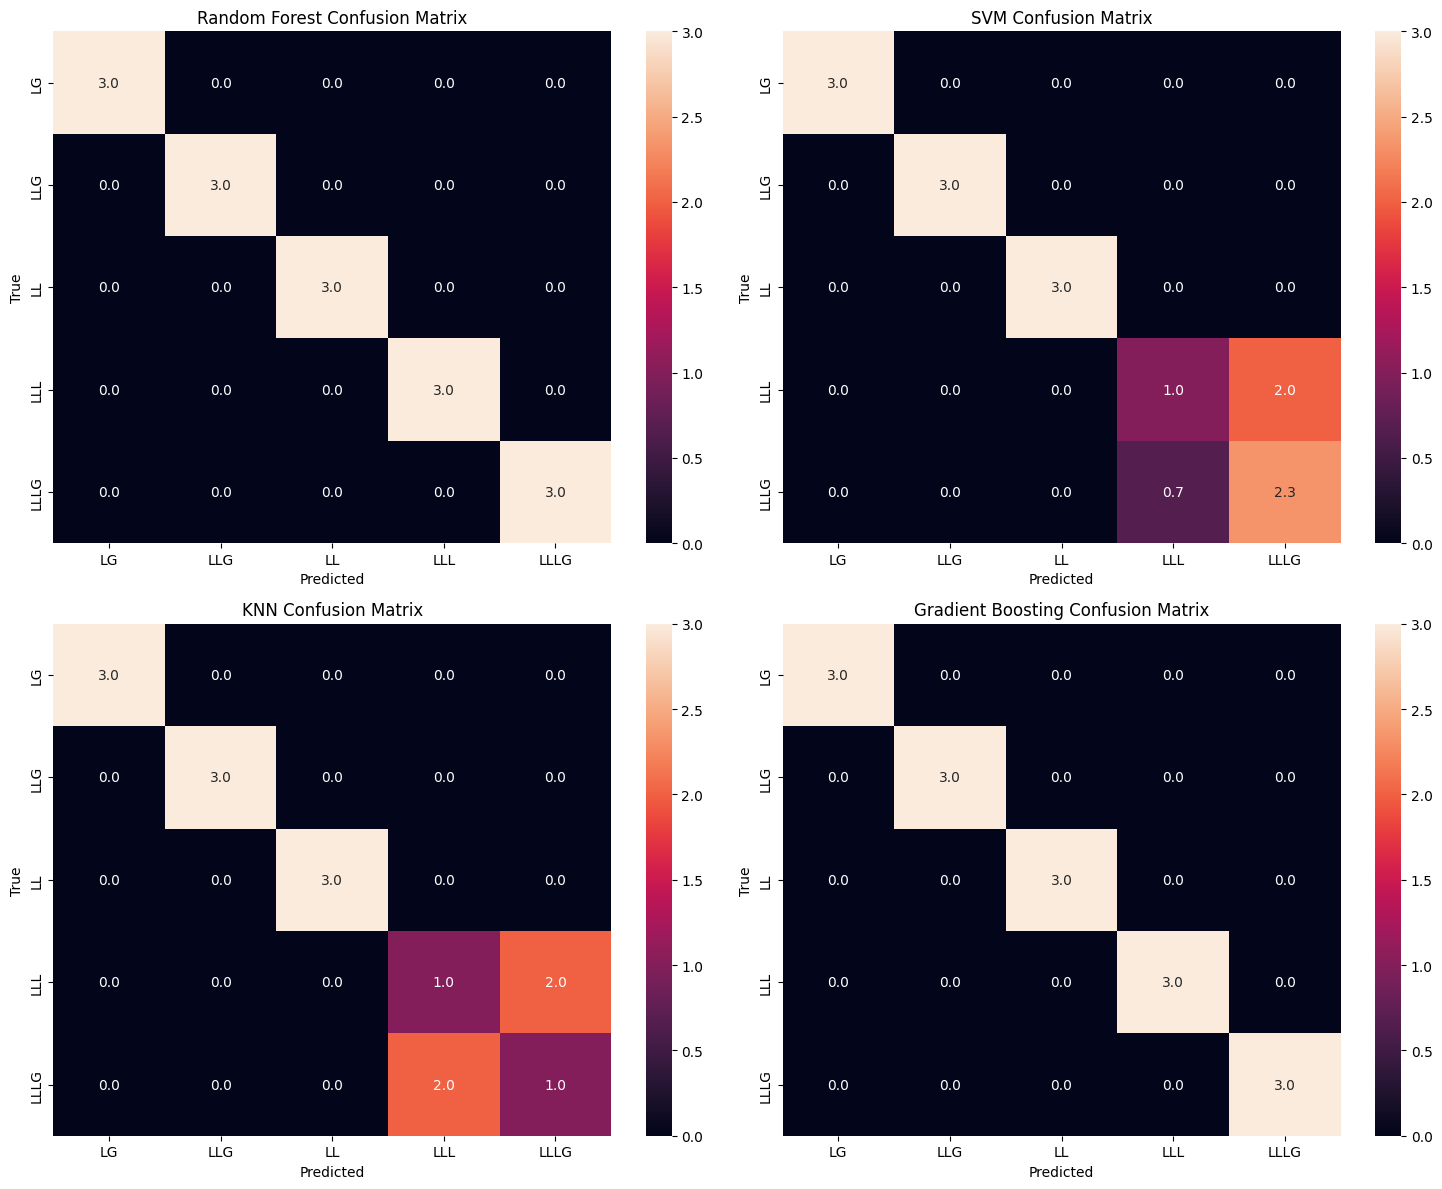

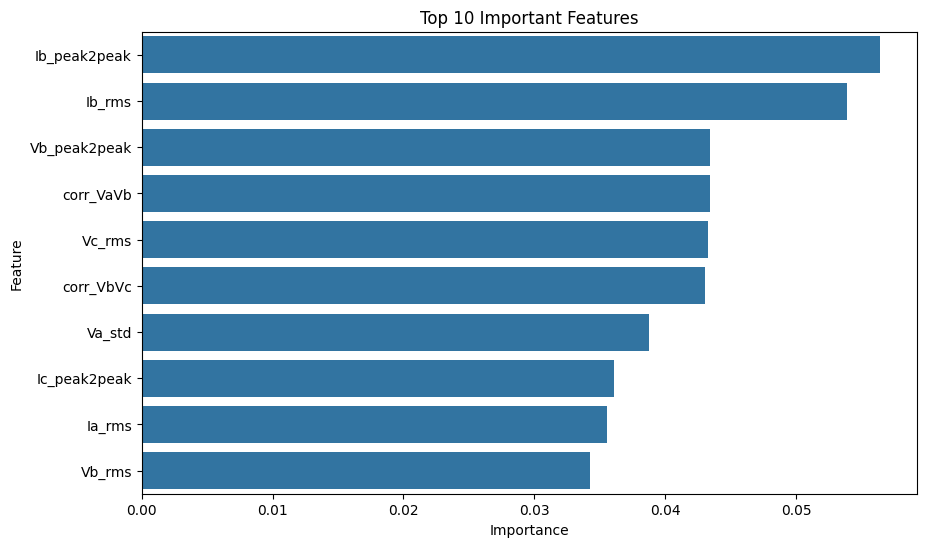

In [8]:
# =====================================================================
# 4. Evaluation and Visualization
# =====================================================================
# Print classification metrics
final_results = pd.DataFrame(results)
print("\nModel Comparison:")
print(final_results[['Model', 'Accuracy']])

# Plot confusion matrices
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for idx, (name, cm) in enumerate(zip(final_results['Model'], final_results['CM'])):
    ax = axes[idx//2][idx%2]
    sns.heatmap(cm, annot=True, fmt='.1f', ax=ax,
                xticklabels=fault_intervals.keys(),
                yticklabels=fault_intervals.keys())
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()

# =====================================================================
# 5. Feature Importance Analysis
# =====================================================================
rf = models['Random Forest'].fit(scaler.fit_transform(X_combined), y_combined)
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances.head(10))
plt.title('Top 10 Important Features')
plt.show()

In [9]:
import joblib
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 1. Save Best Model and Pipeline Components ==============================
# Assuming 'final_results' from previous step contains model comparison
best_model_name = final_results.loc[final_results['Accuracy'].idxmax()]['Model']
best_model = models[best_model_name]

# Retrain on full augmented data with proper scaling
final_scaler = StandardScaler()
X_combined_scaled = final_scaler.fit_transform(X_combined)
best_model.fit(X_combined_scaled, y_combined)

# Save artifacts
joblib.dump(best_model, 'fault_classifier.joblib')
joblib.dump(final_scaler, 'classifier_scaler.joblib')
joblib.dump(list(fault_intervals.keys()), 'class_names.joblib')  # Save class labels as list


['class_names.joblib']

# Test on new Data

In [23]:
from joblib import load

# Load the saved scaler
scaler = load('scaler.save')  # Loads the scaler object

In [24]:
import tensorflow as tf
# Load the saved autoencoder (replace with your model path)
autoencoder = tf.keras.models.load_model(
    '/content/lstm_autoencoder_anomaly_detection.h5',
    custom_objects={'mse': 'mse'}  # Map 'mse' to Keras' built-in MSE
)

In [25]:
def preprocess_new_data(new_data, scaler, sequence_length):
    # Normalize using the same scaler
    scaled_data = scaler.transform(new_data[['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']])

    # Create sequences
    X_new = []
    for i in range(len(scaled_data) - sequence_length + 1):
        X_new.append(scaled_data[i:i+sequence_length])
    return np.array(X_new)

# Example usage
sequence_length = 50  # Same as in the model
new_data = pd.read_csv('/content/simData2.csv')  # Load new data
X_new_sequences = preprocess_new_data(new_data, scaler, sequence_length)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


374/374 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step


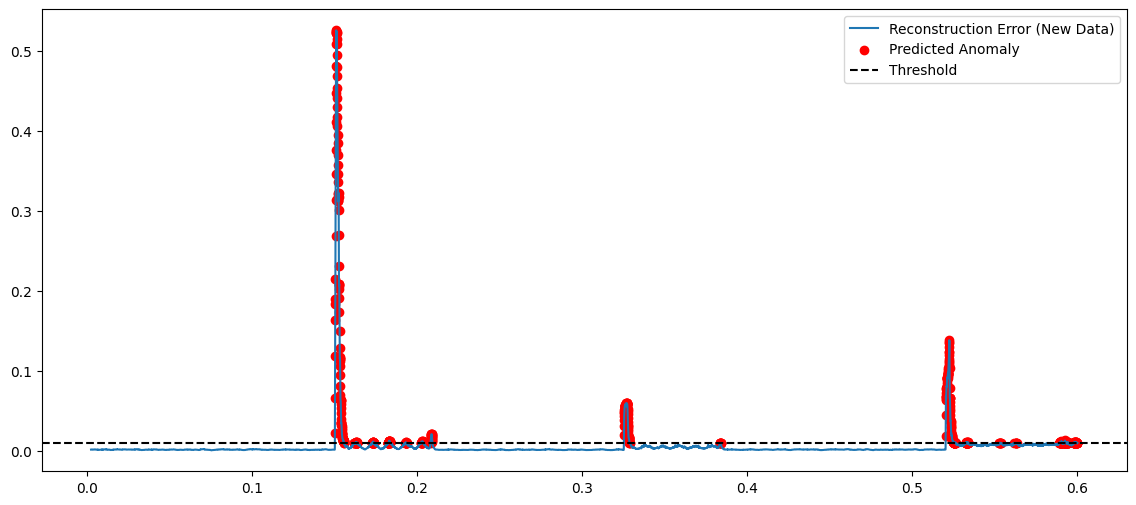

In [17]:
# Get reconstruction errors
new_reconstructions = autoencoder.predict(X_new_sequences)
new_mse = np.mean(np.square(X_new_sequences - new_reconstructions), axis=(1,2))

# Dynamic threshold (e.g., 99th percentile)
new_threshold = np.percentile(new_mse, 95)  # More conservative than training

# Apply the same threshold used in training
anomalies_new = new_mse > new_threshold  # `threshold` from Step 5 in training

# Get timestamps for new data (aligned with window end times)
time_new = new_data['Time'].values[sequence_length - 1 :]

# Visualize results
plt.figure(figsize=(14, 6))
plt.plot(time_new, new_mse, label='Reconstruction Error (New Data)')
plt.scatter(
    time_new[anomalies_new],
    new_mse[anomalies_new],
    color='red', label='Predicted Anomaly'
)
plt.axhline(new_threshold, color='black', linestyle='--', label='Threshold')
plt.legend()
plt.show()

In [18]:
# Get anomaly window indices (positions in new_anomalies)
anomaly_window_indices = np.where(anomalies_new)[0]

# Convert window indices to original data time intervals
original_intervals = []
for win_idx in anomaly_window_indices:
    # Each window starts at index `win_idx` and spans `sequence_length` samples
    start_idx = win_idx
    end_idx = win_idx + sequence_length - 1
    start_time = new_data['Time'].iloc[start_idx]
    end_time = new_data['Time'].iloc[end_idx]
    original_intervals.append((start_time, end_time))

In [19]:
def merge_intervals(intervals, max_gap_samples=500):
    if not intervals:
        return []

    # Calculate time per sample (assuming uniform sampling)
    sample_time = new_data['Time'].iloc[1] - new_data['Time'].iloc[0]
    max_gap_time = max_gap_samples * sample_time

    # Sort intervals by start time
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged = [list(sorted_intervals[0])]
    for current_start, current_end in sorted_intervals[1:]:
        last_start, last_end = merged[-1]

        # Check gap between last interval's end and current interval's start
        if current_start <= last_end + max_gap_time:
            # Merge intervals
            merged[-1][1] = max(last_end, current_end)
        else:
            merged.append([current_start, current_end])

    return [tuple(interval) for interval in merged]

# Merge intervals with ≤500-sample gaps
merged_intervals = merge_intervals(original_intervals, max_gap_samples=1500)

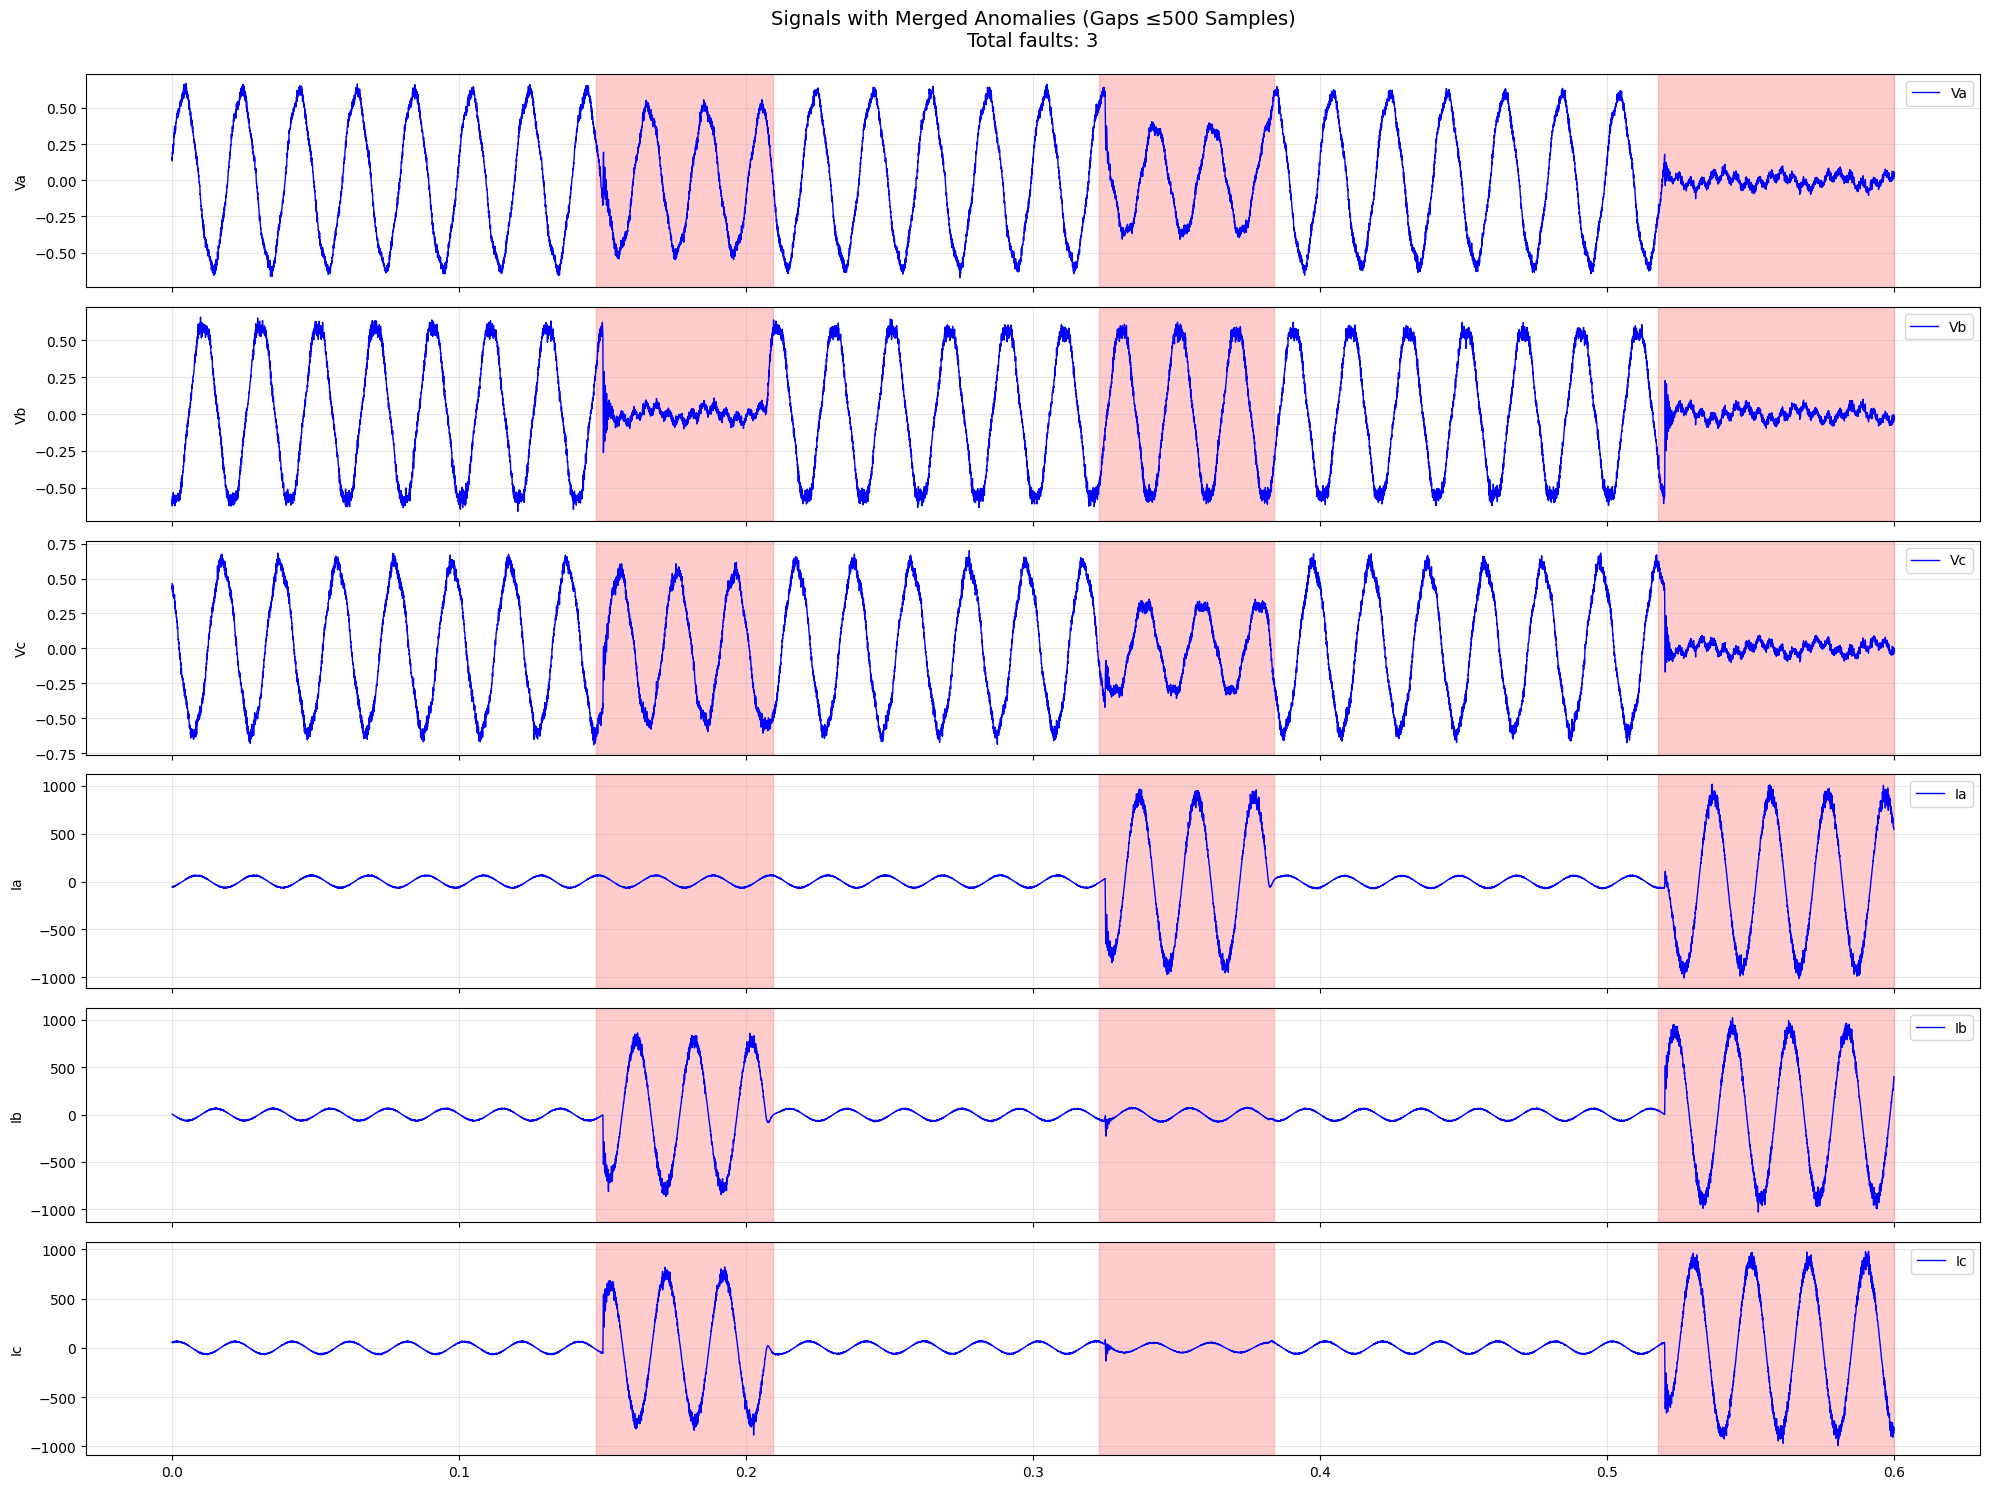

In [20]:
fig, axes = plt.subplots(6, 1, figsize=(20, 15), sharex=True)
signals = ['Va', 'Vb', 'Vc', 'Ia', 'Ib', 'Ic']

for ax, signal in zip(axes, signals):
    # Plot raw signal
    ax.plot(new_data['Time'], new_data[signal], color="blue", label=signal, linewidth=1)

    # Highlight merged anomaly intervals
    for start, end in merged_intervals:
        ax.axvspan(start, end, color='red', alpha=0.2)

    ax.set_ylabel(signal)
    ax.legend(loc='upper right')
    ax.grid(alpha=0.3)

axes[0].set_title(
    f'Signals with Merged Anomalies (Gaps ≤500 Samples)\n'
    f'Total faults: {len(merged_intervals)}',
    fontsize=14, pad=20
)
plt.tight_layout()
plt.show()

In [26]:
# 2. Prediction Function for New Data ======================================
def predict_anomaly_intervals(new_data, interval_list):
    """
    Predict fault types for new anomaly intervals
    Args:
        new_data: DataFrame with Time, Va, Vb, Vc, Ia, Ib, Ic
        interval_list: List of [start, end] time intervals to classify
    Returns:
        DataFrame with predictions and confidence scores
    """
    # Load artifacts
    model = joblib.load('fault_classifier.joblib')
    scaler = joblib.load('classifier_scaler.joblib')
    classes = joblib.load('class_names.joblib')

    # Feature extraction
    features = []
    for interval in interval_list:
        features.append(extract_features(new_data, interval))
    X_new = pd.DataFrame(features)

    # Preprocessing
    X_new_scaled = scaler.transform(X_new)

    # Predictions
    preds = model.predict(X_new_scaled)

    # Confidence scores (if supported)
    if hasattr(model, 'predict_proba'):
        probas = model.predict_proba(X_new_scaled)
        confidences = np.max(probas, axis=1)
    else:  # For models without probability estimates
        confidences = np.ones(len(preds)) * np.nan

    return pd.DataFrame({
        'start_time': [i[0] for i in interval_list],
        'end_time': [i[1] for i in interval_list],
        'predicted_fault': preds,
        'confidence': confidences
    })

In [27]:
# 3. Usage Example ========================================================
# Load new unlabeled data
new_data = pd.read_csv('/content/simData2.csv')

# Get detected intervals (from previous anomaly detection step)
detected_intervals = merged_intervals  # Implement your detection method

# Get predictions
predictions = predict_anomaly_intervals(new_data, detected_intervals)

# 4. Enhanced Output Formatting ===========================================
def format_predictions(predictions_df):
    # Add duration column
    predictions_df['duration'] = predictions_df['end_time'] - predictions_df['start_time']

    # Format confidence
    predictions_df['confidence'] = predictions_df['confidence'].apply(
        lambda x: f"{x:.1%}" if not np.isnan(x) else 'N/A')

    # Sort by start time
    return predictions_df.sort_values('start_time').reset_index(drop=True)

# Display formatted results
formatted_results = format_predictions(predictions)
print("\nAnomaly Classification Results:")
print(formatted_results)


Anomaly Classification Results:
   start_time  end_time predicted_fault confidence  duration
0     0.14775   0.20925              LL      84.1%   0.06150
1     0.32285   0.38390              LG      84.3%   0.06105
2     0.51775   0.60000             LLL      43.1%   0.08225
